# Cross Polarized Cylindrical Gravitational Waves of Einstein and Rosen by  Halilsoy
##  Geoff Cope
##  Univeristy of Utah
##  January 7, 2022

http://i-rep.emu.edu.tr:8080/xmlui/bitstream/handle/11129/2086/Il%20Nuovo%20Cimento%20B%20%281971-1996%29%20Volume%20102%20issue%206%201988%20%5Bdoi%2010.1007%252Fbf02725615%5D%20M.%20Halilsoy%20--%20Cross-polarized%20cylindrical%20gravitational%20waves%20of%20Einstein%20and%20Rosen.pdf?sequence=1

https://www.youtube.com/watch?v=IkHVQr7c-RU

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [98]:
t,rho,phi,z,dt,drho,dphi,dz,A = symbols( 't rho phi z dt drho dphi dz A' ) 

In [4]:
psi = Function('psi')(rho,t)
psi

In [5]:
omega = Function('omega')(rho,t)
omega

In [6]:
gamma = Function('gamma')(rho,t)
gamma

In [7]:
variables = Matrix( [t,rho,phi,z] )
variables

⎡t⎤
⎢ ⎥
⎢ρ⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [8]:
differentials = Matrix( [dt,drho,dphi,dz] ) 
differentials

⎡ dt ⎤
⎢    ⎥
⎢drho⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [9]:
lineElement = expand( exp(2*(gamma - psi)) * (dt**2 -drho**2) - exp(2*psi) * ( dz + omega * dphi)**2 -rho**2*exp(-2*psi)*dphi**2 ) 
lineElement

In [10]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡ 2⋅γ(ρ, t)  -2⋅ψ(ρ, t)                                                                     
⎢ℯ         ⋅ℯ                       0                               0                       
⎢                                                                                           
⎢                          2⋅γ(ρ, t)  -2⋅ψ(ρ, t)                                            
⎢          0             -ℯ         ⋅ℯ                              0                       
⎢                                                                                           
⎢                                                    2  -2⋅ψ(ρ, t)    2        2⋅ψ(ρ, t)    
⎢          0                        0             - ρ ⋅ℯ           - ω (ρ, t)⋅ℯ           -ω
⎢                                                                                           
⎢                                                                    2⋅ψ(ρ, t)              
⎣          0                        0                      -ω(ρ, t)⋅ℯ 

In [11]:
import sympy

In [12]:
m = sympy.Array(g)
m

⎡ 2⋅γ(ρ, t)  -2⋅ψ(ρ, t)                                                                     
⎢ℯ         ⋅ℯ                       0                               0                       
⎢                                                                                           
⎢                          2⋅γ(ρ, t)  -2⋅ψ(ρ, t)                                            
⎢          0             -ℯ         ⋅ℯ                              0                       
⎢                                                                                           
⎢                                                    2  -2⋅ψ(ρ, t)    2        2⋅ψ(ρ, t)    
⎢          0                        0             - ρ ⋅ℯ           - ω (ρ, t)⋅ℯ           -ω
⎢                                                                                           
⎢                                                                    2⋅ψ(ρ, t)              
⎣          0                        0                      -ω(ρ, t)⋅ℯ 

In [13]:
from einsteinpy.symbolic import *

In [14]:
syms = sympy.symbols("t rho phi z")
t,rho,phi,z = syms

In [15]:
metric = MetricTensor(m,syms)

In [16]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢⎡∂             ∂            ∂             ∂                                                
⎢⎢──(γ(ρ, t)) - ──(ψ(ρ, t))  ──(γ(ρ, t)) - ──(ψ(ρ, t))                                      
⎢⎢∂t            ∂t           ∂ρ            ∂ρ                                               
⎢⎢                                                                                          
⎢⎢∂             ∂            ∂             ∂                                                
⎢⎢──(γ(ρ, t)) - ──(ψ(ρ, t))  ──(γ(ρ, t)) - ──(ψ(ρ, t))                                      
⎢⎢∂ρ            ∂ρ           ∂t            ∂t                         

In [17]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                                                                           
⎢                                                                               ∂           
⎢  2              2              2                           2     2            ──(γ(ρ, t)) 
⎢ ∂              ∂              ∂               ⎛∂          ⎞     ∂             ∂ρ          
⎢───(γ(ρ, t)) - ───(γ(ρ, t)) - ───(ψ(ρ, t)) - 2⋅⎜──(ψ(ρ, t))⎟  + ───(ψ(ρ, t)) + ─────────── 
⎢  2              2              2              ⎝∂t         ⎠      2                 ρ      
⎢∂ρ             ∂t             ∂ρ                                ∂t                         
⎢                                                                                           
⎢                                                                                           
⎢                                                         ∂              4⋅ψ(ρ, t) ∂        
⎢                                                         ──(γ(ρ, t)) 

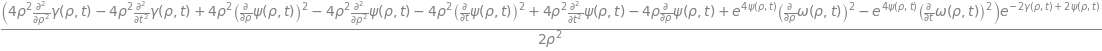

In [18]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [19]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                               ∂           
⎢  2              2              2                           2     2            ──(γ(ρ, t)) 
⎢ ∂              ∂              ∂               ⎛∂          ⎞     ∂             ∂ρ          
⎢───(γ(ρ, t)) - ───(γ(ρ, t)) - ───(ψ(ρ, t)) - 2⋅⎜──(ψ(ρ, t))⎟  + ───(ψ(ρ, t)) + ─────────── 
⎢  2              2              2              ⎝∂t         ⎠      2                 ρ      
⎢∂ρ             ∂t             ∂ρ                                ∂t                         
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [20]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [21]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

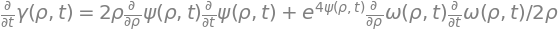

In [30]:
dgammdt = Eq(diff(gamma,t) ,solve( Ric.tensor()[1,0] , diff(gamma,t) )[0] )
dgammdt

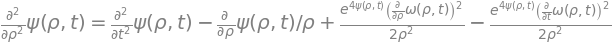

In [29]:
d2psidrho2 = Eq(diff(psi,rho,rho), expand( solve( Ric.tensor()[3,3].args[1], diff(psi,rho,rho) )[0] ) ) 
d2psidrho2

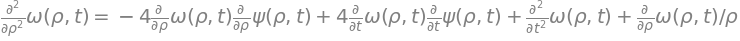

In [37]:
d2omegadrho2 = Eq( diff(omega,rho,rho), solve( Ric.tensor()[2,2].args[1].subs(d2psidrho2.args[0],d2psidrho2.args[1] ) , diff(omega,rho,rho) )[0] )
d2omegadrho2

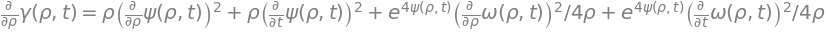

In [42]:
dgammadrho = Eq(diff(gamma,rho), expand( solve( ( Ric.tensor()[0,0] + Ric.tensor()[1,1] ) , diff(gamma,rho) )[0] ) )
dgammadrho

In [45]:
vacuumFieldEquations = Matrix([d2psidrho2,d2omegadrho2,dgammadrho,dgammdt])
vacuumFieldEquations

⎡                                                                        2                  
⎢                                  ∂              4⋅ψ(ρ, t) ⎛∂          ⎞     4⋅ψ(ρ, t) ⎛∂  
⎢      2              2            ──(ψ(ρ, t))   ℯ         ⋅⎜──(ω(ρ, t))⎟    ℯ         ⋅⎜──(
⎢     ∂              ∂             ∂ρ                       ⎝∂ρ         ⎠               ⎝∂t 
⎢    ───(ψ(ρ, t)) = ───(ψ(ρ, t)) - ─────────── + ───────────────────────── - ───────────────
⎢      2              2                 ρ                      2                           2
⎢    ∂ρ             ∂t                                      2⋅ρ                         2⋅ρ 
⎢                                                                                           
⎢                                                                                           
⎢     2                                                                        2            
⎢    ∂                 ∂           ∂               ∂           ∂      

In [53]:
import sympy

In [89]:
#  Lesson learned.. if you declare the separation constant to be an integer you get sin and cos otherwise exp(i)
sigma = symbols('sigma', integer = True)

In [46]:
X = Function('X')(t,rho)
X

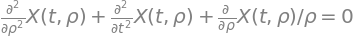

In [68]:
equation12 = Eq( diff(X,t,t) + (1/rho) * diff(X,rho) + diff(X,rho,rho) , 0 ) 
equation12 

In [51]:
Y,Z = map(Function, 'YZ')

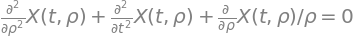

In [69]:
#  This comes up a bit... the Laplacian with all terms positive will gives bessel functions Y and J.  Changing the signs on the last two terms give different special functions 
eq = equation12 
eq

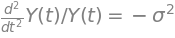

In [90]:
xODE = Eq(pde_separate( eq, X, [Y(t),Z(rho)])[0] , - sigma**2 ) 
xODE 

In [91]:
xSolution = dsolve( xODE , Y(t))
xSolution 

In [92]:
xSolutionParticular = xSolution.subs(xSolution.args[1].args[0].args[0],0).subs(xSolution.args[1].args[1].args[0],1)
xSolutionParticular

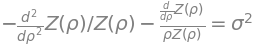

In [93]:
yODE = Eq( pde_separate( eq, X, [Y(t),Z(rho)])[1] ,  sigma**2 ) 
yODE

In [94]:
ySolution = dsolve( yODE , Z(rho) ) 
ySolution 

In [95]:
ySolutionParticular = ySolution.subs(ySolution.args[1].args[0].args[0],1).subs(ySolution.args[1].args[1].args[0],0)
ySolutionParticular

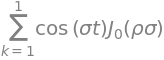

In [96]:
#  Here we just do one term to match what they've got...
Sum( ( xSolutionParticular.args[1] * ySolutionParticular.args[1] ) ,(k,1,1) )

In [97]:
Sum( ( xSolutionParticular.args[1] * ySolutionParticular.args[1] ) ,(k,1,1) ).doit()

In [99]:
#  Listed at the bottom of page 565
seedXSolution = (1/2)*A*Sum( ( xSolutionParticular.args[1] * ySolutionParticular.args[1] ) ,(k,1,1) ).doit()
seedXSolution